#  EV Charging Station Data - Exploratory Data Analysis (EDA)

## Objective
The goal of this notebook is to perform Exploratory Data Analysis (EDA) on electric vehicle (EV) charging station data. This analysis helps uncover data quality issues, identify trends, and reveal patterns related to charger types, usage, and geographic distribution. Insights derived here will support decision-making for infrastructure planning and forecasting future demand.


### Required Libraries

Ensure the following Python libraries installed:
```bash
pip install pandas numpy matplotlib seaborn folium
```

### Step 1: Import Required Libraries and Load the Datasets

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
df_car_registration = pd.read_csv("DataSets/20100025.csv")
canadacities = pd.read_csv("DataSets/canadacities.csv")


C:\Users\divya\AppData\Local\Temp\ipykernel_20176\3347953110.py:7: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_car_registration = pd.read_csv("DataSets/20100025.csv")


### Step 2: Data Overview and Data Cleaning

In [5]:


# Clean and normalize city names
df_car_registration = df_car_registration.dropna(subset=["GEO"])
df_car_registration["GEO_clean"] = df_car_registration["GEO"].str.strip().str.lower()
canadacities["city_ascii_clean"] = canadacities["city_ascii"].str.strip().str.lower()

# Merge to get province info
merged_df = df_car_registration.merge(
    canadacities[["city_ascii_clean", "province_name"]],
    left_on="GEO_clean",
    right_on="city_ascii_clean",
    how="left"
)

# Filter for EVs only
ev_df = merged_df[merged_df["Fuel type"].isin(["Battery electric", "Plug-in hybrid electric"])]

# Group by province and city, sum EVs
ev_summary = (
    ev_df.groupby(["province_name", "GEO"])["VALUE"]
    .sum()
    .reset_index()
    .sort_values(by=["province_name", "VALUE"], ascending=[True, False])
)

# Print top cities by EV count for each province
print("Top Cities by EV Count per Province:")
for province in ev_summary["province_name"].dropna().unique():
    print(f"\nProvince: {province}")
    top_cities = ev_summary[ev_summary["province_name"] == province].head(5)
    for _, row in top_cities.iterrows():
        print(f"  {row['GEO']}: {int(row['VALUE'])}")


Top Cities by EV Count per Province:

Province: Alberta
  Cochrane: 24
  Airdrie: 0
  Alberta Beach: 0
  Athabasca: 0
  Banff: 0

Province: British Columbia
  Vancouver: 82118
  Surrey: 55982
  Richmond: 29164
  Burnaby: 23408
  Coquitlam: 16210

Province: Manitoba
  Winnipeg: 10772
  Victoria: 4896
  Lakeshore: 1180
  Brandon: 580
  East St. Paul: 328

Province: New Brunswick
  Richmond: 29164
  Kingston: 3392
  Woodstock: 1162
  Wilmot: 1128
  Lincoln: 704

Province: Newfoundland and Labrador
  Victoria: 4896
  Baie Verte: 0
  Bay Bulls: 0
  Bay Roberts: 0
  Bonavista: 0

Province: Northwest Territories
  Yellowknife: 202
  Hay River: 42
  Fort Smith: 12
  Inuvik: 6
  Fort Simpson: 2

Province: Nova Scotia
  Halifax: 8890
  Windsor: 3854
  Cape Breton: 952
  Lunenburg: 396
  Chester: 268

Province: Nunavut
  Iqaluit: 4
  Cambridge Bay: 2
  Clyde River: 2
  Kugluktuk: 2
  Arviat: 0

Province: Ontario
  Toronto: 82760
  Ottawa: 34274
  Mississauga: 30254
  Markham: 21814
  Brampton: 21

In [6]:
unmatched_cities = merged_df[merged_df["province_name"].isna()]["GEO"].unique()

# Print unmatched cities
print("Unmatched GEO cities not found in city-to-province mapping:")
for city in unmatched_cities:
    print("-", city)

Unmatched GEO cities not found in city-to-province mapping:
- Canada
- Newfoundland and Labrador
- St. John's, Newfoundland and Labrador
- Flatrock
- Bauline
- Mount Pearl
- Petty Harbour-Maddox Cove
- Bay Roberts, Newfoundland and Labrador
- Bishop's Cove
- Spaniard's Bay
- North River
- Grand Falls-Windsor, Newfoundland and Labrador
- Grand Falls-Windsor
- Gander, Newfoundland and Labrador
- Division No.  6, Subd. E
- Appleton
- Glenwood
- Corner Brook, Newfoundland and Labrador
- Division No.  5, Subd. F
- Steady Brook
- Gillams
- Humber Arm South
- McIvers
- Meadows
- Hughes Brook
- Mount Moriah
- Non CMA-CA, Newfoundland and Labrador
- Division No.  1, Subd. U
- Renews-Cappahayden
- Fermeuse
- Division No.  1, Subd. W
- St. Vincent's-St. Stephen's-Peter's River
- Heart's Content
- Division No.  1, Subd. L
- Division No.  1, Subd. M
- Clarke's Beach
- Cupids
- Division No.  1, Subd. N
- Brigus
- Division No.  1, Subd. O
- Colliers
- Conception Harbour
- Avondale
- Division No.  1, 

In [7]:
unmatched_ontario = ev_df[(ev_df["province_name"].isna()) & (ev_df["GEO"].str.contains("Ontario", case=False, na=False))]

# Extract unique cities
missing_ontario_cities = unmatched_ontario["GEO"].unique()

# Print results
print("Ontario EV cities that were NOT matched to a province:")
for city in missing_ontario_cities:
    print("-", city)


Ontario EV cities that were NOT matched to a province:
- Ontario
- Cornwall, Ontario
- Hawkesbury, Ontario part
- Ottawa - Gatineau, Ontario part
- Arnprior, Ontario
- Carleton Place, Ontario
- Brockville, Ontario
- Pembroke, Ontario
- Petawawa, Ontario
- Kingston, Ontario
- Belleville, Ontario
- Cobourg, Ontario
- Port Hope, Ontario
- Peterborough, Ontario
- Kawartha Lakes, Ontario
- Centre Wellington, Ontario
- Oshawa, Ontario
- Ingersoll, Ontario
- Toronto, Ontario
- Hamilton, Ontario
- St. Catharines - Niagara, Ontario
- Kitchener - Cambridge - Waterloo, Ontario
- Brantford, Ontario
- Woodstock, Ontario
- Tillsonburg, Ontario
- Norfolk, Ontario
- Guelph, Ontario
- Stratford, Ontario
- London, Ontario
- Chatham-Kent, Ontario
- Leamington, Ontario
- Windsor, Ontario
- Sarnia, Ontario
- Wasaga Beach, Ontario
- Owen Sound, Ontario
- Collingwood, Ontario
- Barrie, Ontario
- Orillia, Ontario
- Midland, Ontario
- North Bay, Ontario
- Greater Sudbury / Grand Sudbury, Ontario
- Elliot Lake,

### Step 3: Data Transformations

In [8]:
# Split GEO into separate city and province columns
df_car_registration[["City", "Province_from_GEO"]] = df_car_registration["GEO_clean"].str.extract(r"^(.*?)[,\-]\s*(\w+)$")

# Clean city for merge
df_car_registration["City_clean"] = df_car_registration["City"].str.strip().str.lower()

# Preview
df_car_registration[["GEO", "City", "Province_from_GEO"]].head()

,GEO,City,Province_from_GEO
0,Canada,NaN,NaN
1,Canada,NaN,NaN
2,Canada,NaN,NaN
3,Canada,NaN,NaN
4,Canada,NaN,NaN


In [11]:
# Load city-to-province mapping
canadacities = pd.read_csv("DataSets/canadacities.csv")
canadacities["city_ascii_clean"] = canadacities["city_ascii"].str.strip().str.lower()

# Merge on cleaned city name
merged_df = df_car_registration.merge(
    canadacities[["city_ascii_clean", "province_name"]],
    left_on="City_clean",
    right_on="city_ascii_clean",
    how="left"
)

# Check unmatched cities
unmatched = merged_df[merged_df["province_name"].isna()]
print("Unmatched cities after separating city and province from GEO:")
print(unmatched["GEO"].unique())


Unmatched cities after separating city and province from GEO:
['Canada' 'Newfoundland and Labrador'
 "St. John's, Newfoundland and Labrador" ... 'Gjoa Haven' 'Taloyoak'
 'Kitikmeot, Unorganized']


In [12]:
# Merge on cleaned city names
merged_df = df_car_registration.merge(
    canadacities[["city_ascii_clean", "province_name"]],
    left_on="City_clean",
    right_on="city_ascii_clean",
    how="left"
)

# Filter for EVs only
ev_df = merged_df[
    merged_df["Fuel type"].isin(["Battery electric", "Plug-in hybrid electric"]) &
    merged_df["province_name"].notna() &
    merged_df["City"].notna()
]

# Group by province and city to get EV vehicle totals
ev_summary = (
    ev_df.groupby(["province_name", "City"])["VALUE"]
    .sum()
    .reset_index()
    .sort_values(by=["province_name", "VALUE"], ascending=[True, False])
)

# Print final output
print("✅ EV Registration Summary (Province → City → EV Count):")
for province in ev_summary["province_name"].unique():
    print(f"\nProvince: {province}")
    top_cities = ev_summary[ev_summary["province_name"] == province]
    for _, row in top_cities.iterrows():
        print(f"  {row['City']}: {int(row['VALUE'])} EVs")



✅ EV Registration Summary (Province → City → EV Count):

Province: Alberta
  brooks: 0 EVs
  calgary: 0 EVs
  camrose: 0 EVs
  canmore: 0 EVs
  cold lake: 0 EVs
  edmonton: 0 EVs
  grande prairie: 0 EVs
  high river: 0 EVs
  lacombe: 0 EVs
  lethbridge: 0 EVs
  medicine hat: 0 EVs
  okotoks: 0 EVs
  red deer: 0 EVs
  strathmore: 0 EVs
  sylvan lake: 0 EVs
  wetaskiwin: 0 EVs
  wood buffalo: 0 EVs

Province: Manitoba
  winnipeg: 12174 EVs
  brandon: 642 EVs
  winkler: 232 EVs
  steinbach: 164 EVs
  portage la prairie: 146 EVs
  morris: 48 EVs
  thompson: 40 EVs
  boissevain: 0 EVs

Province: New Brunswick
  kingston: 4074 EVs
  woodstock: 1162 EVs
  durham: 0 EVs
  florenceville: 0 EVs
  grand falls: 0 EVs
  minto: 0 EVs
  perth: 0 EVs
  saint-charles: 0 EVs

Province: Newfoundland and Labrador
  grand falls: 0 EVs

Province: Nova Scotia
  windsor: 7002 EVs

Province: Ontario
  toronto: 250934 EVs
  hamilton: 26036 EVs
  oshawa: 12066 EVs
  london: 12032 EVs
  windsor: 7002 EVs
  barrie

### Step 4: Data Visualization

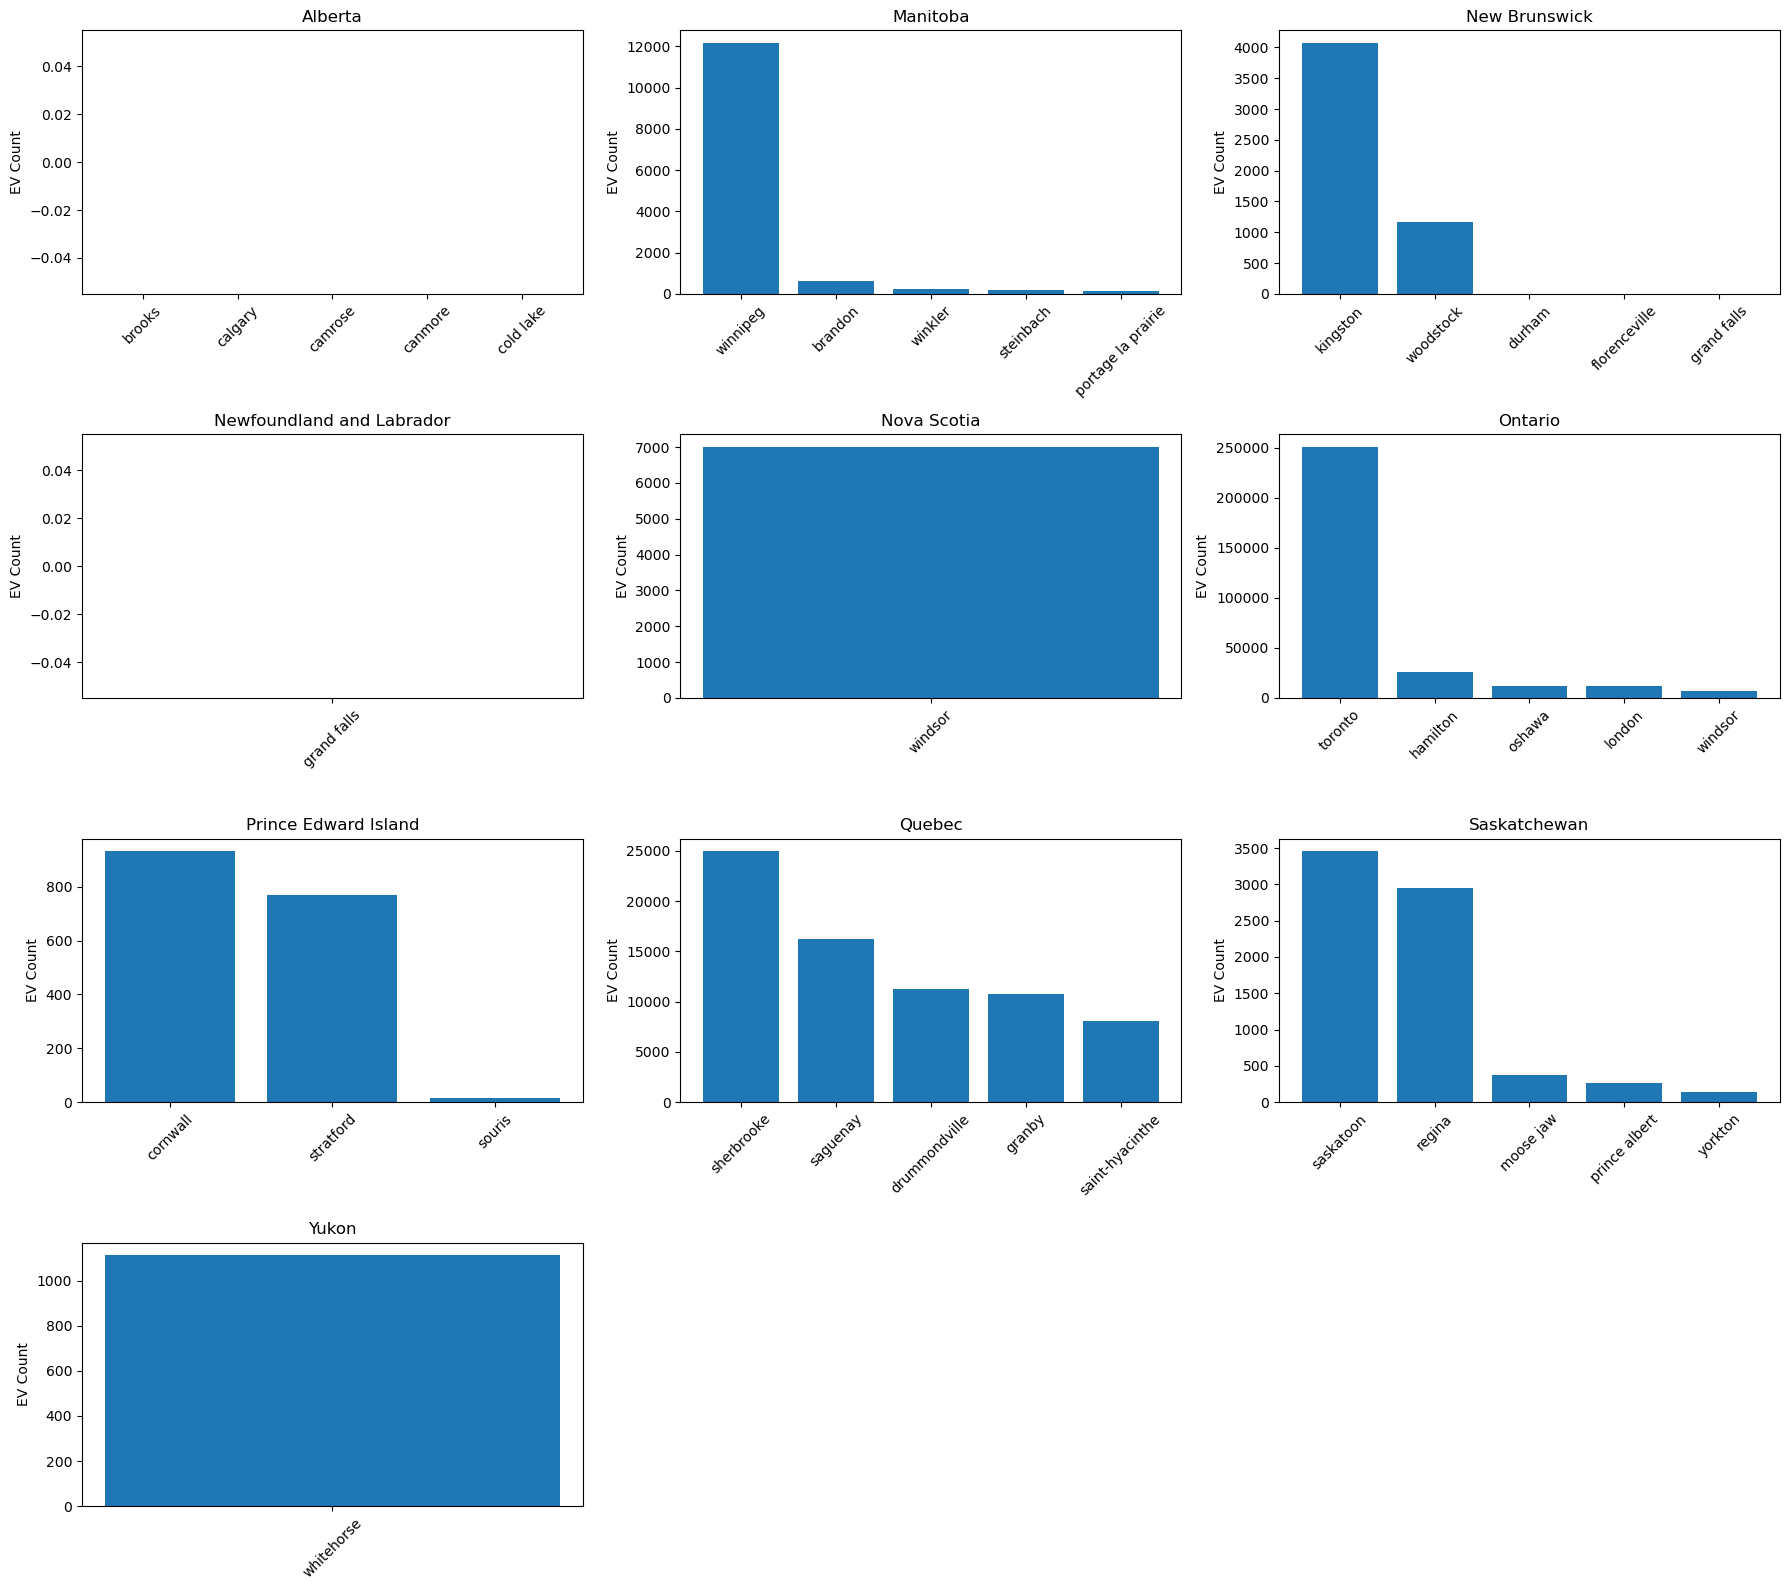

In [13]:
import matplotlib.pyplot as plt

provinces = ev_summary["province_name"].unique()
n = len(provinces)
cols = 3
rows = (n // cols) + (n % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4))
axes = axes.flatten()

for i, province in enumerate(provinces):
    df = ev_summary[ev_summary["province_name"] == province].head(5)
    axes[i].bar(df["City"], df["VALUE"])
    axes[i].set_title(province)
    axes[i].set_ylabel("EV Count")
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


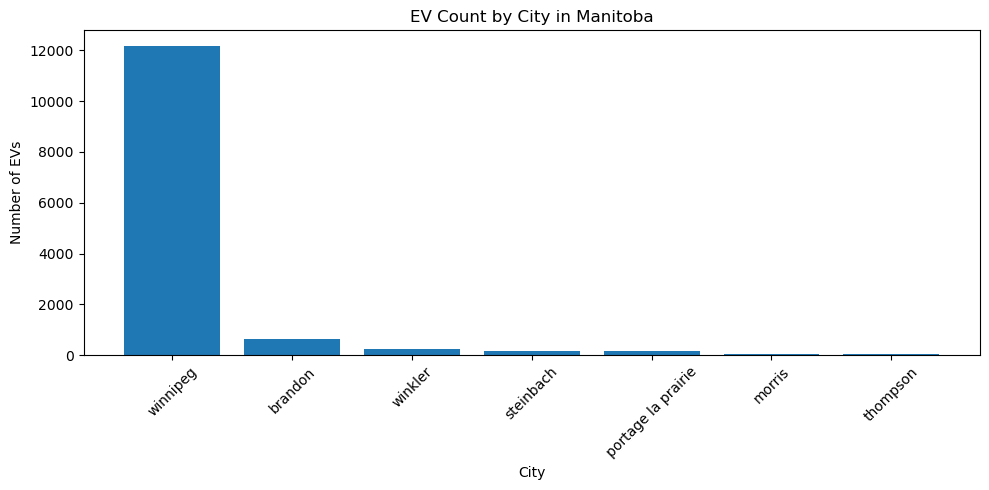

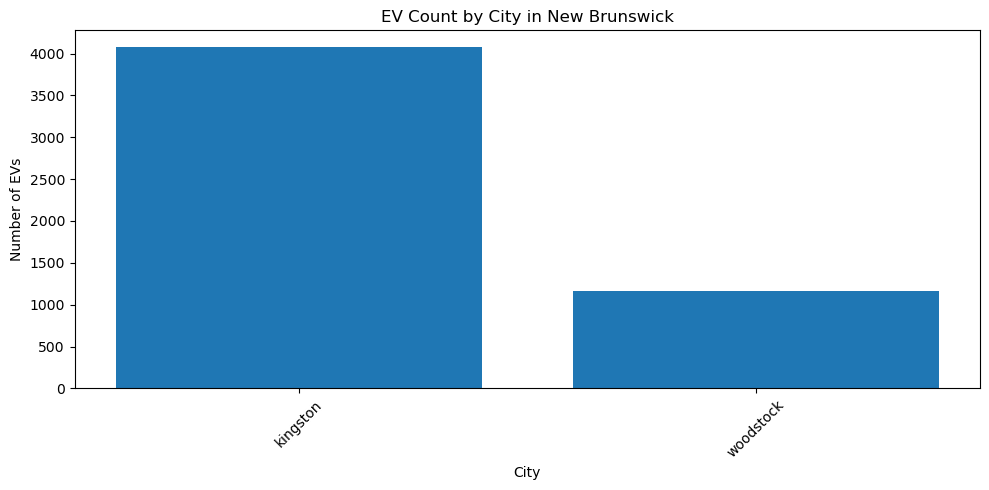

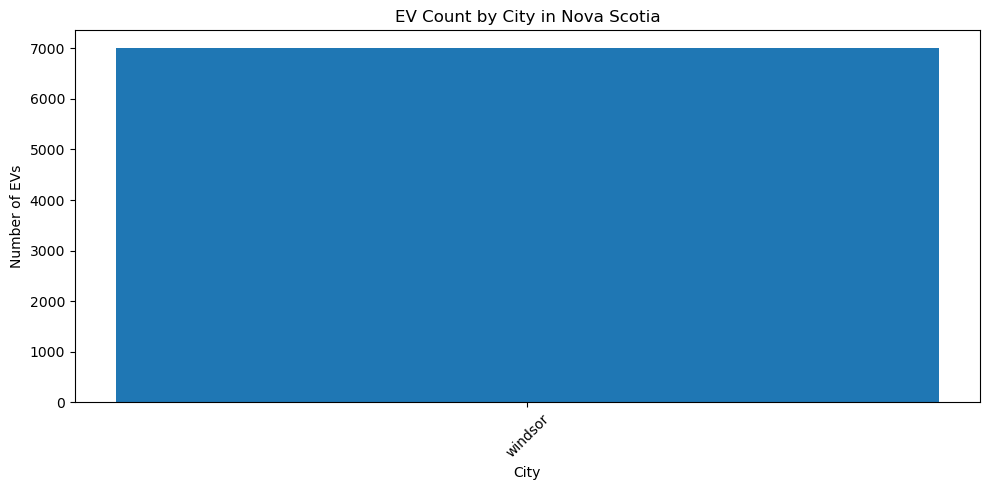

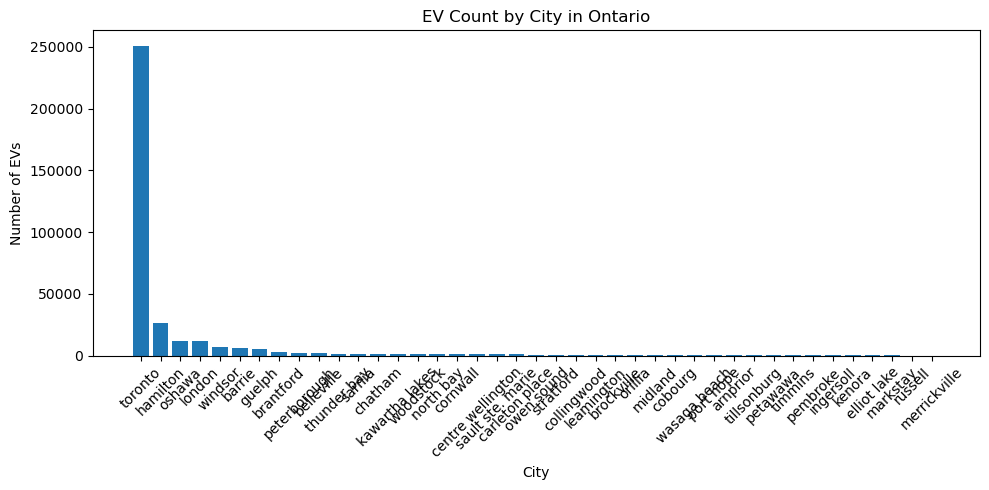

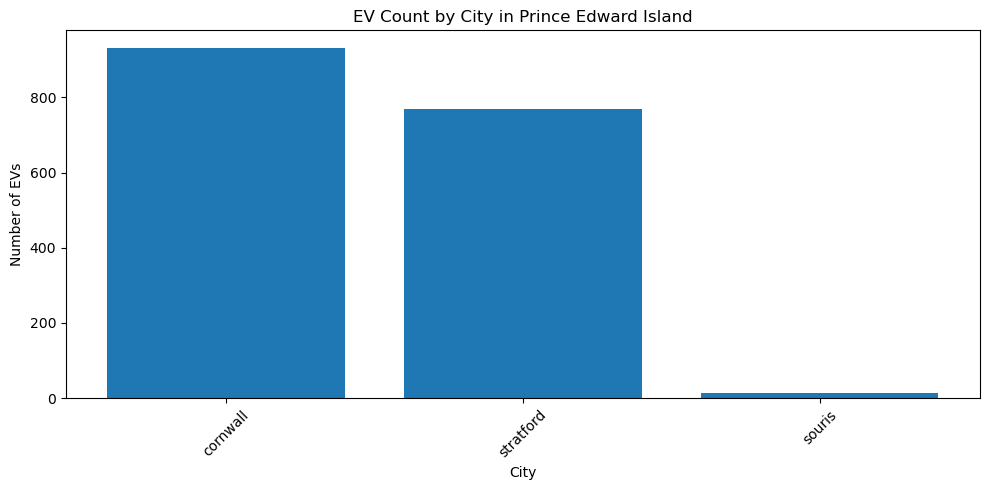

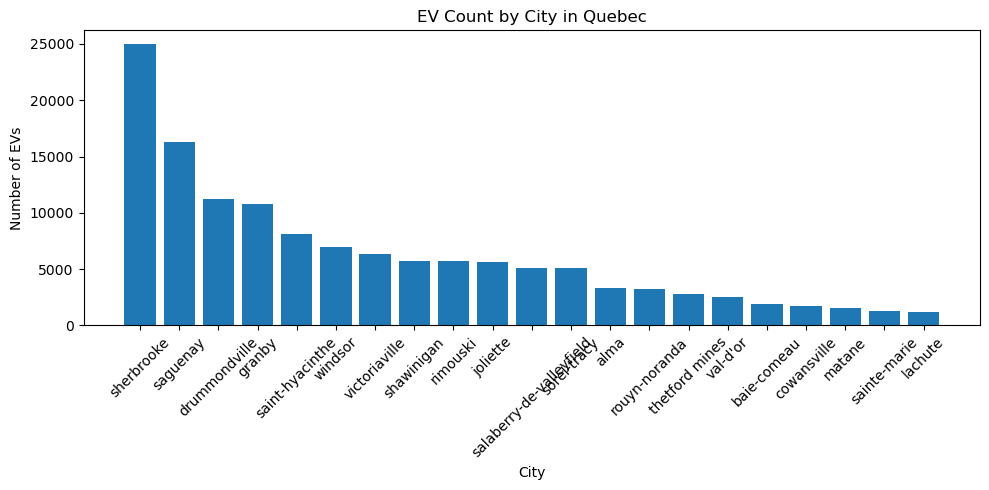

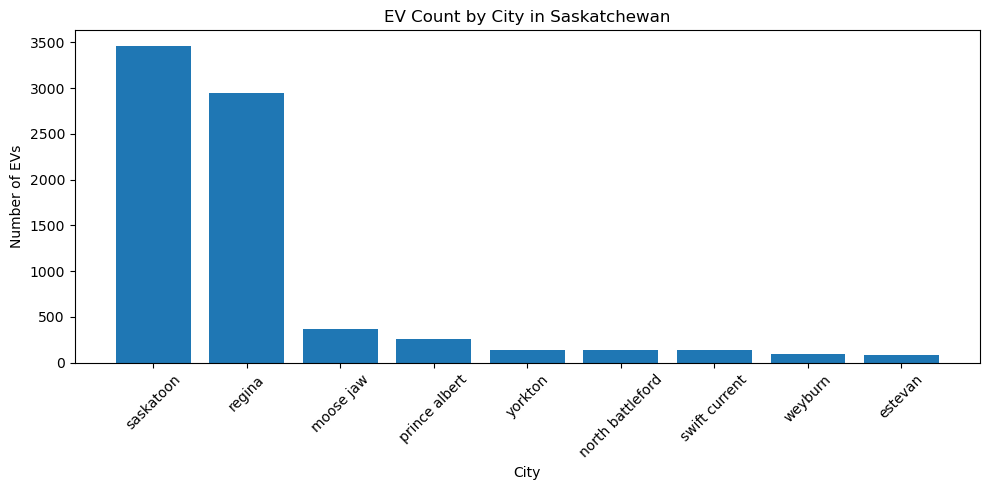

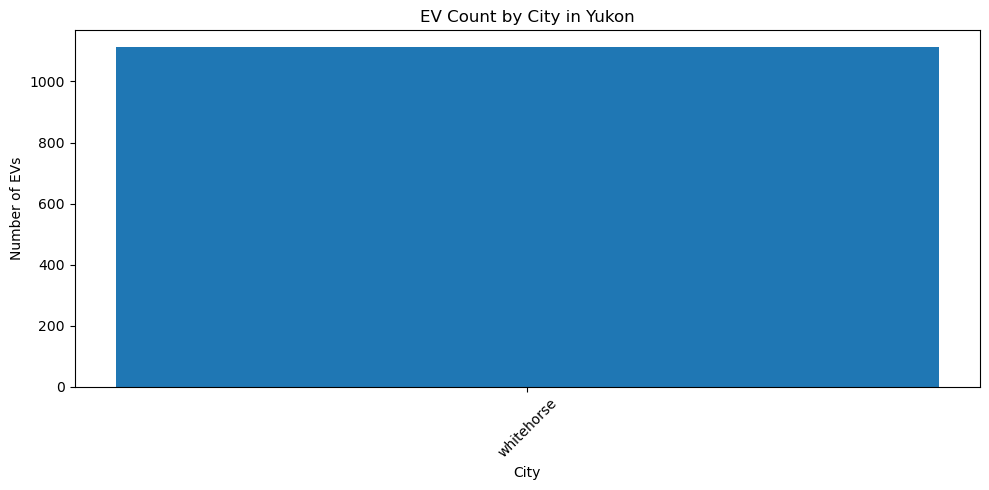

In [14]:
import matplotlib.pyplot as plt

# Filter for cities with more than 0 EVs
filtered_summary = ev_summary[ev_summary["VALUE"] > 0]

# Loop through each province and plot individually
for province in filtered_summary["province_name"].unique():
    df = filtered_summary[filtered_summary["province_name"] == province]

    plt.figure(figsize=(10, 5))
    plt.bar(df["City"], df["VALUE"])
    plt.title(f"EV Count by City in {province}")
    plt.xlabel("City")
    plt.ylabel("Number of EVs")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [15]:
# Load stations detail dataset
stations_df = pd.read_csv("DataSets/stations_detail.csv")

# Clean city names
stations_df["City_clean"] = stations_df["City"].str.strip().str.lower()
ev_summary["City_clean"] = ev_summary["City"].str.strip().str.lower()

# Count number of charging stations per city
station_counts = (
    stations_df.groupby("City_clean")["Id"]
    .count()
    .reset_index(name="charging_station_count")
)

# Merge EV data with station count
merged_ev_station = ev_summary.merge(station_counts, on="City_clean", how="left")
merged_ev_station["charging_station_count"] = merged_ev_station["charging_station_count"].fillna(0).astype(int)

# Calculate EVs per station (replace 0 with 1 to avoid division by zero)
merged_ev_station["evs_per_station"] = merged_ev_station["VALUE"] / merged_ev_station["charging_station_count"].replace(0, 1)

# Display top 20 cities with highest EVs per station (potentially underserved)
result = merged_ev_station[["province_name", "City", "VALUE", "charging_station_count", "evs_per_station"]]
print(result.sort_values(by="evs_per_station", ascending=False))


   province_name                      City     VALUE  charging_station_count  \
48       Ontario            kawartha lakes    1174.0                       1   
83        Quebec                  saguenay   16268.0                      16   
52       Ontario         centre wellington     912.0                       0   
35       Ontario                   toronto  250934.0                     428   
92        Quebec  salaberry-de-valleyfield    5122.0                      16   
..           ...                       ...       ...                     ...   
14       Alberta               sylvan lake       0.0                       4   
13       Alberta                strathmore       0.0                       3   
12       Alberta                  red deer       0.0                      16   
10       Alberta              medicine hat       0.0                      10   
0        Alberta                    brooks       0.0                       4   

    evs_per_station  
48      1174.0000

In [18]:
# Merge EV data with station count
merged_ev_station = ev_summary.merge(station_counts, on="City_clean", how="left")
merged_ev_station["charging_station_count"] = merged_ev_station["charging_station_count"].fillna(0).astype(int)

# Select and rename only necessary columns
result = merged_ev_station[["province_name", "City", "VALUE", "charging_station_count"]]
result = result.rename(columns={
    "province_name": "Province",
    "City": "City",
    "VALUE": "EV_Count",
    "charging_station_count": "Charging_Stations"
})

# Sort by EV count descending
result = result.sort_values(by="EV_Count", ascending=False)

# Show top cities

least_cities = result.sort_values(by="EV_Count", ascending=False).head(10)
least_cities



,Province,City,EV_Count,Charging_Stations
35,Ontario,toronto,250934.0,428
36,Ontario,hamilton,26036.0,89
82,Quebec,sherbrooke,24964.0,100
83,Quebec,saguenay,16268.0,16
17,Manitoba,winnipeg,12174.0,119
37,Ontario,oshawa,12066.0,38
38,Ontario,london,12032.0,113
84,Quebec,drummondville,11234.0,45
85,Quebec,granby,10780.0,41
86,Quebec,saint-hyacinthe,8108.0,37


In [17]:
# Show bottom cities by EV count
least_cities = result.sort_values(by="EV_Count", ascending=True).head(10)
least_cities


,Province,City,EV_Count,Charging_Stations
0,Alberta,brooks,0.0,4
16,Alberta,wood buffalo,0.0,0
4,Alberta,cold lake,0.0,3
5,Alberta,edmonton,0.0,138
2,Alberta,camrose,0.0,5
3,Alberta,canmore,0.0,15
112,Quebec,stanstead,0.0,3
111,Quebec,sainte-marguerite,0.0,0
110,Quebec,saint-urbain,0.0,3
33,Newfoundland and Labrador,grand falls,0.0,4


In [ ]:
result.to_csv("ev_city_station_summary.csv", index=False)

##  Key Insights, Observations, Reflections & Conclusions

###  Key Insights

- **Ontario leads EV adoption**: Toronto alone accounts for over **250,000 EVs**, supported by **428 charging stations**, making it the most EV-friendly city.
- **High adoption in Quebec and Manitoba**: Cities like Sherbrooke, Saguenay, and Winnipeg also show strong EV presence.
- **Urban bias is clear**: Most top cities are urban centers with stronger infrastructure, population density, and policy support.
- **Zero EV cities still have infrastructure**: Cities like **Edmonton (138 stations)** and **Canmore** show **zero EVs**, which may indicate:
  - Early infrastructure rollout with delayed adoption
  - Data inconsistencies or misreporting
- **Bottom 10 cities** include locations from Alberta, Quebec, and Newfoundland with **0 EVs and minimal charging stations**, pointing to critical EV access gaps.




###  Observations

- **Data quality checks** were crucial — missing or mismatched city/province names were handled through cleaning and merging.
- **Enrichment with geographic data** (e.g., province names) allowed meaningful regional analysis.
- **EV counts** were not always aligned with the number of charging stations, especially in smaller cities.
- **Disparities across provinces** emphasize that EV adoption is not uniformly progressing across Canada.





###  Reflections

- **Urban-rural EV divide**: The analysis reinforces the need to **bridge EV access** between high-density and remote areas.
- **Infrastructure ≠ Adoption**: Building charging stations alone doesn't guarantee EV uptake — local engagement, affordability, and incentives matter.
- **Policy Impact**: Provinces with better incentives and awareness campaigns (like Ontario & Quebec) show greater EV adoption.
- **Data Gaps Exist**: Some cities show zero EVs despite infrastructure — further investigation or data validation is recommended.





###  Conclusions

- **Ontario and Quebec are EV leaders**, but other provinces lag significantly.
- **Government and industry** must target underserved cities with both infrastructure and consumer-focused programs.
- This EDA has successfully:
  - Identified geographic disparities in EV access
  - Quantified infrastructure-to-EV gaps
  - Highlighted cities needing further investment
- The results support the development of **predictive models**, **resource allocation tools**, and **policy simulations** in future work.


